<div style="background-image:url(images/meschede-seismic-waves.png); padding: 10px 30px 20px 30px; background-size:cover; background-opacity:50%; border-radius:5px; background-position: 0px -200px">
<p style="float:right; margin-top:20px; padding: 20px 60px 0px 10px; background:rgba(255,255,255,0.75); border-radius:10px;">
<img width="400px" src=images/obspy_logo_full_524x179px.png?raw=true>
</p>

<h1 style="color:#BBB; padding-bottom: 80px">ObsPy Tutorial</h1>

<h2 style="color:#FFF; padding-bottom: 30px">Retrieving Data from Data Centers / Databases</h2>

</div>

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

ObsPy has clients to directly fetch data via...

- FDSN webservices (IRIS, Geofon/GFZ, USGS, NCEDC, SeisComp3 instances, ...)
- ArcLink (EIDA, ...)
- Earthworm
- SeedLink (near-realtime servers)
- NERIES/NERA/seismicportal.eu
- NEIC
- SeisHub (local seismological database)

This introduction shows how to use the FDSN webservice client. The FDSN webservice definition is by now the default web service implemented by many data centers world wide. Clients for other protocols work similar to the FDSN client.

#### Waveform Data

2 Trace(s) in Stream:
II.PFO.00.LHZ | 2011-03-11T05:56:23.069500Z - 2011-03-11T06:16:22.069500Z | 1.0 Hz, 1200 samples
II.PFO.10.LHZ | 2011-03-11T05:56:23.069500Z - 2011-03-11T06:16:22.069500Z | 1.0 Hz, 1200 samples


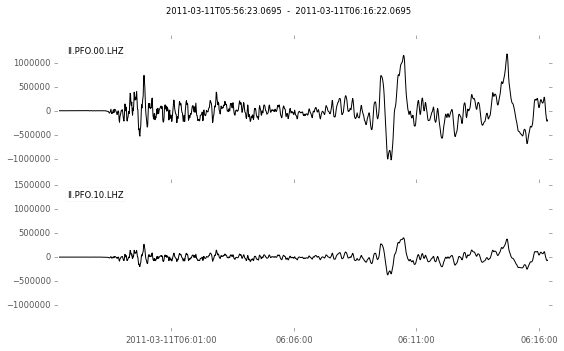

In [2]:
from obspy import UTCDateTime
from obspy.fdsn import Client

client = Client("IRIS")
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku
st = client.get_waveforms("II", "PFO", "*", "LHZ",
                          t + 10 * 60, t + 30 * 60)
print(st)
st.plot()

- again, waveform data is returned as a Stream object
- for all custom processing workflows it does not matter if the data originates from a local file or from a web service

#### Event Metadata

The FDSN client can also be used to request event metadata:

3 Event(s) in Catalog:
2011-03-11T06:25:50.740000Z | +38.051, +144.630 | 7.6 MW
2011-03-11T06:15:37.570000Z | +36.227, +141.088 | 7.9 MW
2011-03-11T05:46:23.200000Z | +38.296, +142.498 | 9.1 MW


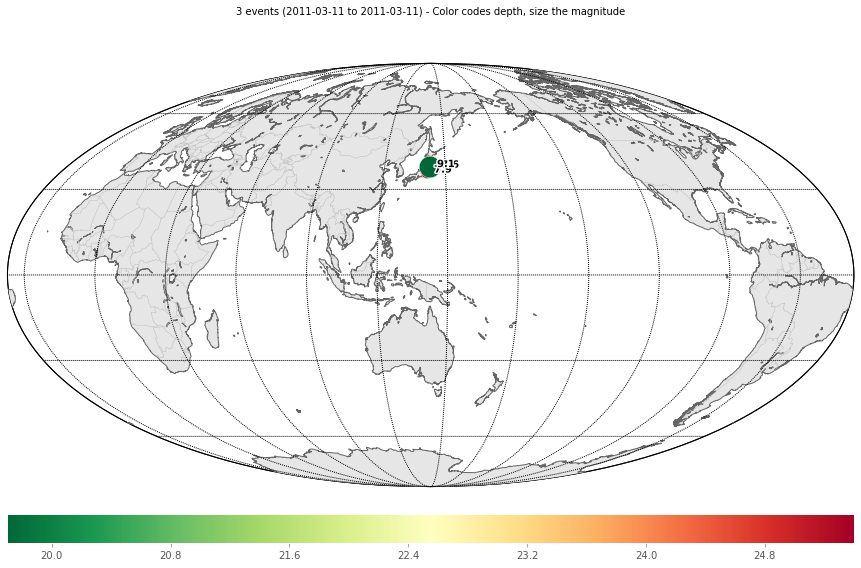

In [3]:
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku
catalog = client.get_events(starttime=t - 100, endtime=t + 24 * 3600,
                            minmagnitude=7)
print(catalog)
catalog.plot();

Requests can have a wide range of constraints (see [ObsPy Documentation](http://docs.obspy.org/packages/autogen/obspy.fdsn.client.Client.get_events.html)):

- time range
- geographical (lonlat-box, circular by distance)
- depth range
- magnitude range, type
- contributing agency

#### Station Metadata

Finally, the FDSN client can be used to request station metadata. Stations can be looked up using a wide range of constraints (see [ObsPy documentation](http://docs.obspy.org/packages/autogen/obspy.fdsn.client.Client.get_stations.html)):

 * network/station code
 * time range of operation
 * geographical (lonlat-box, circular by distance)

In [4]:
event = catalog[0]
origin = event.origins[0]

# Münster
lon = 7.63
lat = 51.96

inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=2.5, level="station")
print(inventory)

Inventory created at 2015-10-26T09:15:02.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.19
		    http://service.iris.edu/fdsnws/station/1/query?latitude=51.96&level...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (5):
			BE
			GE
			NL
			SG
			SY
		Stations (16):
			BE.MEM (Membach, Belgium)
			BE.RCHB (OCHEFORT, BELGIUM)
			BE.UCC (Uccle, Brussels, Belgium)
			GE.FLT1 (Temp GEOFON Station Flechtingen, Germany)
			GE.HLG (UKiel/GEOFON Station Helgoland, Germany)
			GE.HLG (UKiel/GEOFON Station Helgoland, Germany)
			GE.IBBN (RUB/GEOFON Station Ibbenbueren, Germany)
			GE.WLF (GEOFON Station Walferdange, Luxembourg)
			GE.WLF (GEOFON Station Walferdange, Luxembourg)
			NL.HGN (HEIMANSGROEVE, NETHERLANDS)
			SG.MEMB (Membach, Belgium)
			SY.FLT1 (FLT1 synthetic)
			SY.HGN (HGN synthetic)
			SY.HLG (HLG synthetic)
			SY.IBBN (IBBN synthetic)
			SY.WLF (WLF synthetic)
		Channels (0):



The **`level=...`** keyword is used to specify the level of detail in the requested inventory

- `"network"`: only return information on networks matching the criteria
- `"station"`: return information on all matching stations
- `"channel"`: return information on available channels in all stations networks matching the criteria
- `"response"`: include instrument response for all matching channels (large result data size!)

In [5]:
inventory = client.get_stations(network="OE", station="DAVA",
                                level="station")
print(inventory)

Inventory created at 2015-10-26T09:15:03.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.19
		    http://service.iris.edu/fdsnws/station/1/query?network=OE&station=D...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			OE
		Stations (1):
			OE.DAVA (Damuels, Vorarlberg, Austria)
		Channels (0):



In [6]:
inventory = client.get_stations(network="OE", station="DAVA",
                                level="channel")
print(inventory)

Inventory created at 2015-10-26T09:15:03.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.19
		    http://service.iris.edu/fdsnws/station/1/query?network=OE&station=D...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			OE
		Stations (1):
			OE.DAVA (Damuels, Vorarlberg, Austria)
		Channels (14):
			OE.DAVA..BHE, OE.DAVA..BHN, OE.DAVA..BHZ, OE.DAVA..HHE,
			OE.DAVA..HHN, OE.DAVA..HHZ, OE.DAVA..LCQ, OE.DAVA..LHE,
			OE.DAVA..LHN, OE.DAVA..LHZ, OE.DAVA..UFC, OE.DAVA..VHE,
			OE.DAVA..VHN, OE.DAVA..VHZ


For waveform requests that include instrument correction, the appropriate instrument response information can be attached to waveforms automatically:     
(Of course, for work on large datasets, the better choice is to download all station information and avoid the internal repeated webservice requests)

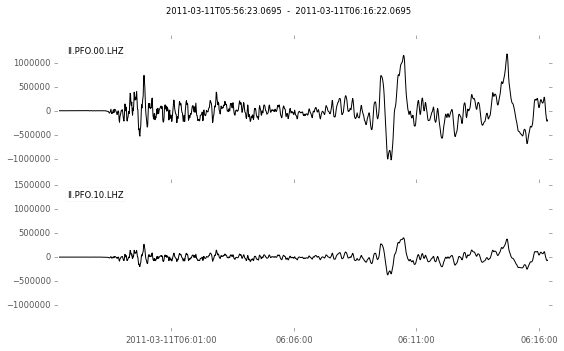

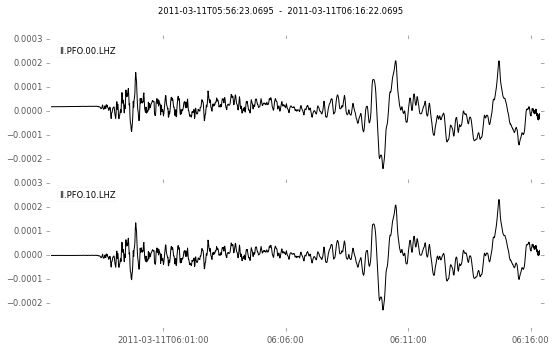

In [7]:
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku
st = client.get_waveforms("II", "PFO", "*", "LHZ",
                          t + 10 * 60, t + 30 * 60, attach_response=True)
st.plot()

st.remove_response()
st.plot()

All data requested using the FDSN client can be directly saved to file using the **`filename="..."`** option. The data is then stored exactly as it is served by the data center, i.e. without first parsing by ObsPy and outputting by ObsPy.

In [8]:
client.get_events(starttime=t-100, endtime=t+24*3600, minmagnitude=7,
                  filename="/tmp/requested_events.xml")
client.get_stations(network="OE", station="DAVA", level="station",
                    filename="/tmp/requested_stations.xml")
client.get_waveforms("II", "PFO", "*", "LHZ", t + 10 * 60, t + 30 * 60,
                     filename="/tmp/requested_waveforms.mseed")
!ls -lrt /tmp/requested*

-rw-r--r--  1 lion  wheel   1414 Oct 26 10:15 /tmp/requested_stations.xml
-rw-r--r--  1 lion  wheel   5047 Oct 26 10:15 /tmp/requested_events.xml
-rw-r--r--  1 lion  wheel  16384 Oct 26 10:15 /tmp/requested_waveforms.mseed


#### FDSN Client Exercise

Use the FDSN client to assemble a waveform dataset for on event.

- search for a large earthquake (e.g. by depth or in a region of your choice, use option **`limit=5`** to keep network traffic down)

5 Event(s) in Catalog:
2015-05-30T11:23:02.110000Z | +27.839, +140.493 | 7.8 MWW
2015-02-27T13:45:05.370000Z |  -7.297, +122.535 | 7.0 MWW
2014-11-01T18:57:22.380000Z | -19.690, -177.759 | 7.1 MWW
2013-05-24T05:44:49.600000Z | +54.874, +153.281 | 8.3 MW
2012-08-14T02:59:38.460000Z | +49.800, +145.064 | 7.7 MW


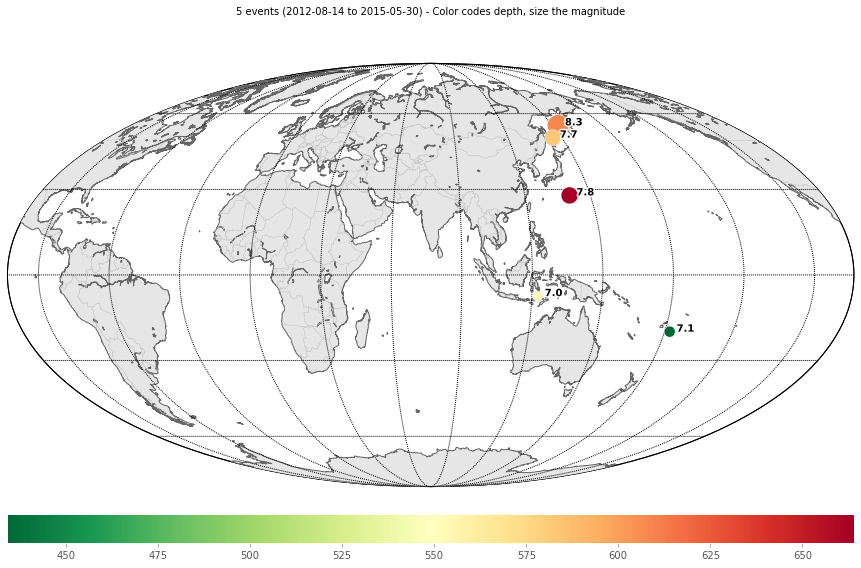

Event:	2015-05-30T11:23:02.110000Z | +27.839, +140.493 | 7.8 MWW

	        resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=5148725")
	         event_type: 'earthquake'
	---------
	 event_descriptions: 1 Elements
	            origins: 1 Elements
	         magnitudes: 1 Elements


In [9]:
from obspy.fdsn import Client

client = Client()
catalog = client.get_events(minmagnitude=7, limit=5, mindepth=400)
print(catalog)
catalog.plot()
event = catalog[0]
print(event)

- search for stations to look at waveforms for the event. stations should..
    * be available at the time of the event
    * have a vertical 1 Hz stream ("LHZ", to not overpower our network..)
    * be in a narrow angular distance around the event (e.g. 90-91 degrees)
    * adjust your search so that only a small number of stations (e.g. 3-6) match your search criteria

In [10]:
origin = event.origins[0]
t = origin.time

inventory = client.get_stations(longitude=origin.longitude, latitude=origin.latitude,
                                minradius=101, maxradius=101.1,
                                starttime=t, endtime =t+100,
                                channel="LHZ", matchtimeseries=True)
print(inventory)

Inventory created at 2015-10-26T09:15:24.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.19
		    http://service.iris.edu/fdsnws/station/1/query?endtime=2015-05-30T1...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (6):
			6E
			IU
			LD
			NM
			TA
			X8
		Stations (8):
			6E.WB45 (KY, USA)
			IU.HKT (Hockley, Texas)
			LD.ALLY (Allegheny College, Meadville, PA)
			LD.WVNY (West Valley, New York)
			NM.MPH (Memphis, TN)
			TA.H59A (Cadyville, NY, USA)
			TA.J56A (Wolcott, NY, USA)
			X8.QM28 (6 mile checkpoint, Maine, USA)
		Channels (0):



- for each of these stations download data of the event, e.g. a couple of minutes before to half an hour after the event
- put all data together in one stream (put the `get_waveforms()` call in a try/except/pass block to silently skip stations that actually have no data available)
- print stream info, plot the raw data

8 Trace(s) in Stream:
6E.WB45..LHZ  | 2015-05-30T11:18:03.035000Z - 2015-05-30T11:53:02.035000Z | 1.0 Hz, 2100 samples
IU.HKT.00.LHZ | 2015-05-30T11:18:03.069536Z - 2015-05-30T11:53:02.069536Z | 1.0 Hz, 2100 samples
IU.HKT.10.LHZ | 2015-05-30T11:18:03.069539Z - 2015-05-30T11:53:02.069539Z | 1.0 Hz, 2100 samples
LD.ALLY..LHZ  | 2015-05-30T11:18:03.035000Z - 2015-05-30T11:53:02.035000Z | 1.0 Hz, 2100 samples
LD.WVNY..LHZ  | 2015-05-30T11:18:03.030000Z - 2015-05-30T11:53:02.030000Z | 1.0 Hz, 2100 samples
NM.MPH..LHZ   | 2015-05-30T11:18:03.069538Z - 2015-05-30T11:53:02.069538Z | 1.0 Hz, 2100 samples
TA.H59A..LHZ  | 2015-05-30T11:18:03.000000Z - 2015-05-30T11:53:02.000000Z | 1.0 Hz, 2100 samples
TA.J56A..LHZ  | 2015-05-30T11:18:03.000000Z - 2015-05-30T11:53:02.000000Z | 1.0 Hz, 2100 samples


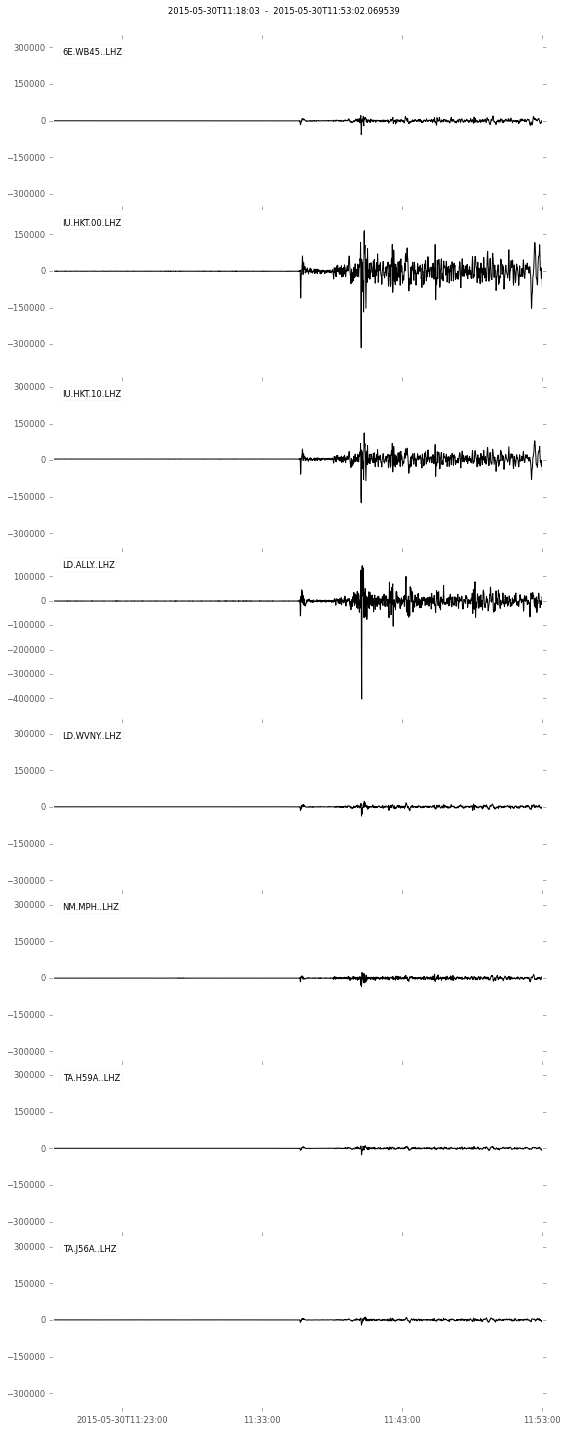

In [11]:
from obspy import Stream
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, "*", "LHZ",
                                       t - 5 * 60, t + 30 * 60, attach_response=True)
        except:
            pass

print(st)
st.plot()

- attach the station metadata to the waveforms (if not done during fetching the waveforms already)
- correct the instrument response for all stations and plot the corrected data

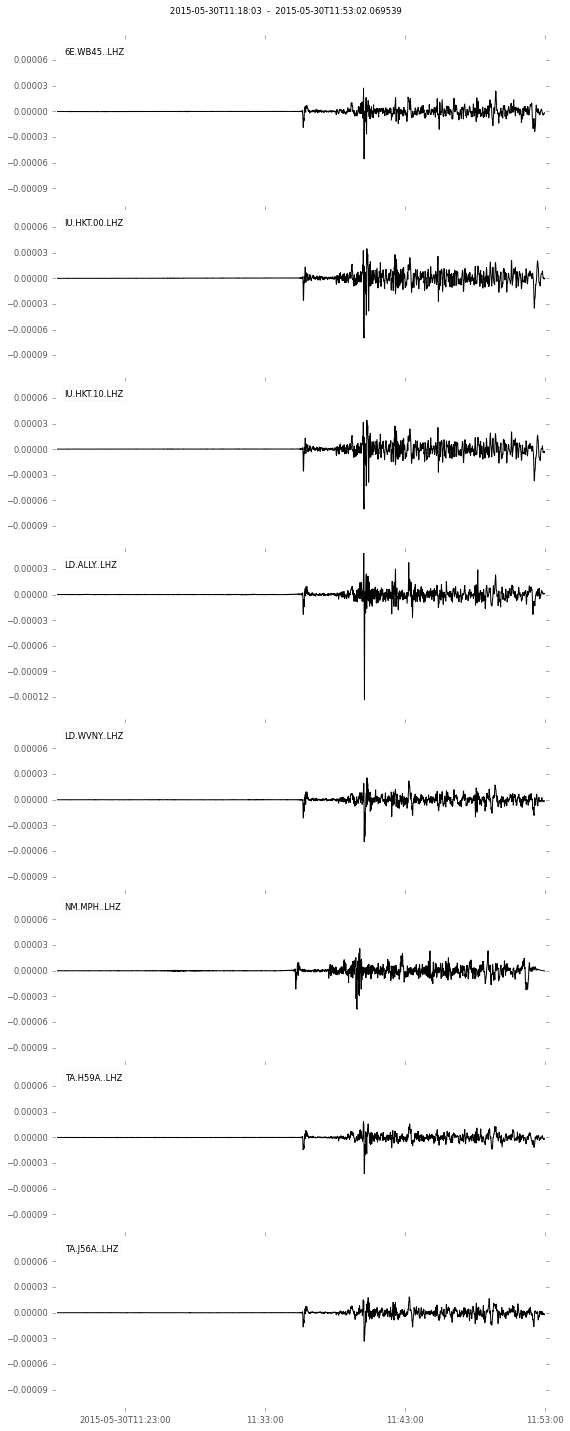

In [12]:
st.remove_response(water_level=20)
st.plot()

If you have time, assemble and plot another similar dataset (e.g. like before stations at a certain distance from a big event, or use Transportable Array data for a big event, etc.)

## Acknowledgements

Background picture at the very top is from Matthias Meschede.